In [148]:
import numpy as np
import pandas as pd
import scipy.stats

pd.options.mode.chained_assignment = None
from matplotlib import pyplot as plt, rcParams
# import cv2
import seaborn as sns

sns.set(style="white", context="paper")
from cycler import cycler
import os, sys
import glob
from datetime import datetime, timedelta
from itertools import combinations
import base64
from PIL import Image
from io import BytesIO as _BytesIO
import requests
import json
import pickle
from datetime import datetime
from IPython.display import display, Markdown, Latex
from sklearn.metrics import *
import collections
from copy import deepcopy
import traceback
import sympy
# import plotly
# from pandas_profiling import ProfileReport

pd.options.display.max_columns = None


def printm(s): return display(Markdown(s))

In [13]:
session_tracking_cache = '../cache/analysis_tracking/session_tracking_info'
session_files = glob.glob(f"{session_tracking_cache}/*.pb")
len(session_files)

786

In [14]:
good_session_files = []
for session_file in session_files:
    # print(session_file)
    try:
        df_session = pickle.load(open(session_file,"rb"))
        if df_session.shape[0]>0:
            good_session_files.append(session_file)
            print(session_file)
    except:
        ...

../cache/analysis_tracking/session_tracking_info/classinsight-cmu_05410A_ghc_4301_201905011500-front.pb
../cache/analysis_tracking/session_tracking_info/classinsight-cmu_21127L_ph_a22_201903191630-front.pb
../cache/analysis_tracking/session_tracking_info/classinsight-cmu_6705A_ph_a18b_201910231129-front.pb
../cache/analysis_tracking/session_tracking_info/classinsight-cmu_21127L_ph_a22_201902141630-front.pb
../cache/analysis_tracking/session_tracking_info/classinsight-cmu_21127J_ghc_4102_201902140930-front.pb
../cache/analysis_tracking/session_tracking_info/classinsight-cmu_17214E_weh_6423_201904241330-front.pb
../cache/analysis_tracking/session_tracking_info/cmu_9214L_weh_5320_20191101113117-front.pb
../cache/analysis_tracking/session_tracking_info/classinsight-cmu_17214B_ph_a21_201904031030-front.pb
../cache/analysis_tracking/session_tracking_info/classinsight-cmu_19603A_ph_a18c_201910161027-front.pb
../cache/analysis_tracking/session_tracking_info/classinsight-cmu_21127J_ghc_4102_201

In [15]:
len(good_session_files)

337

In [102]:
sample_session_file = good_session_files[1]
df_sample_tracking = pickle.load(open(sample_session_file,'rb')).transpose()
df_sample_tracking.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

In [103]:
sample_session_file

'../cache/analysis_tracking/session_tracking_info/classinsight-cmu_21127L_ph_a22_201903191630-front.pb'

In [104]:
df_sample_tracking.shape

(13734, 1580)

(array([2.000e+00, 2.900e+01, 2.470e+02, 9.290e+02, 0.000e+00, 3.482e+03,
        4.959e+03, 3.477e+03, 5.650e+02, 4.400e+01]),
 array([25. , 25.8, 26.6, 27.4, 28.2, 29. , 29.8, 30.6, 31.4, 32.2, 33. ]),
 <BarContainer object of 10 artists>)

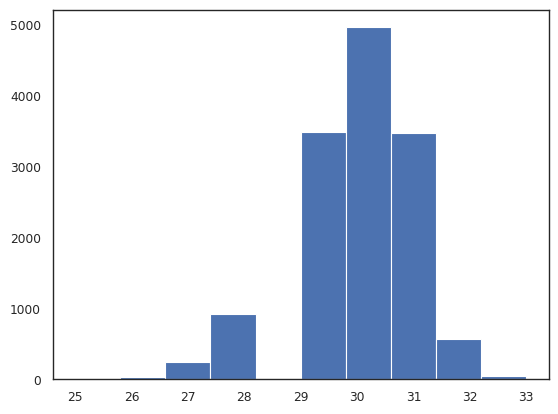

In [105]:
plt.hist(np.nansum(df_sample_tracking, axis=1))

In [123]:
np.nansum(df_sample_tracking, axis=1)
# get the start and stop for each col of pandas
col_start_stop_idxs = []
for col in df_sample_tracking.columns:
    one_idxs = df_sample_tracking.index[np.where(df_sample_tracking[col]==1)[0]].values
    col_start_stop_idxs.append([col, one_idxs.min(), one_idxs.max()])
df_id_start_stop = pd.DataFrame(col_start_stop_idxs, columns=['id','min_idx','max_idx'])
df_id_start_stop

,id,min_idx,max_idx
0,0,0,579
1,1,0,41199
2,2,0,41199
3,3,0,105
4,4,0,41199
...,...,...,...
1575,1575,41163,41163
1576,1576,41166,41166
1577,1577,41187,41187
1578,1578,41190,41190


In [138]:
df_id_start_stop['total_idxs'] = df_id_start_stop['max_idx']-df_id_start_stop['min_idx']
df_id_start_stop = df_id_start_stop[df_id_start_stop.total_idxs>150].reset_index(drop=True)
df_id_start_stop.shape

(134, 4)

In [139]:
df_id_start_stop

,id,min_idx,max_idx,total_idxs
0,0,0,579,579
1,1,0,41199,41199
2,2,0,41199,41199
3,4,0,41199,41199
4,5,0,16305,16305
...,...,...,...,...
129,1450,39063,39237,174
130,1466,39420,39663,243
131,1502,39912,40245,333
132,1503,39939,41199,1260


In [140]:
total_idxs = df_id_start_stop.max_idx.max()
total_idxs

41199

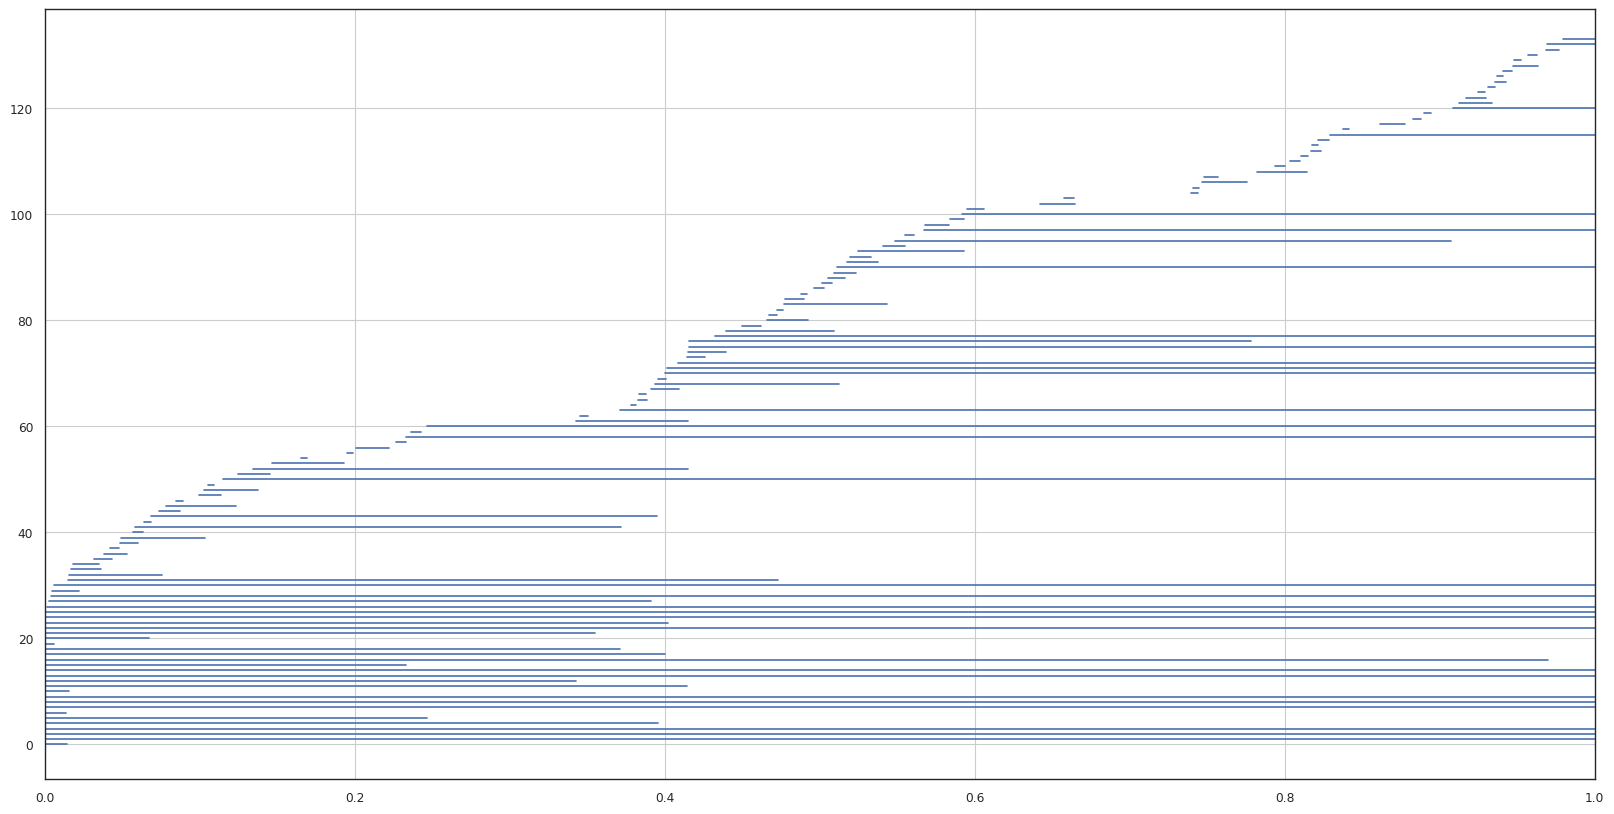

In [141]:
_ = plt.figure(figsize=(20,10))
for row_idx, row in df_id_start_stop.iterrows():
    plt.axhline(y=row_idx, xmin=row['min_idx']/total_idxs,xmax=row['max_idx']/total_idxs)
plt.grid()

In [111]:
one_idx = np.where(df_sample_tracking[0]==1)[0]

In [112]:
one_idx.shape

(190,)

In [113]:
one_idx

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
       133, 134, 135, 136, 137, 139, 140, 141, 142, 143, 144, 145, 146,
       147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
       160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,
       173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 18

In [146]:
potential_id_maps = {}
num_possible_maps = 0
for row_idx, row in df_id_start_stop.iterrows():
    row_maxidx = row['max_idx']
    potential_id_matches = df_id_start_stop[(df_id_start_stop.min_idx<=row_maxidx+15) & (df_id_start_stop.min_idx>row_maxidx)].id.values
    if len(potential_id_matches)>0:
        num_possible_maps+=1
    potential_id_maps[row['id']] = potential_id_matches
    print(row['id'], potential_id_matches, row['min_idx'],row['max_idx'],row['total_idxs'])
print(num_possible_maps)

0 [] 0 579 579
1 [] 0 41199 41199
2 [] 0 41199 41199
4 [] 0 41199 41199
5 [] 0 16305 16305
6 [] 0 10167 10167
7 [] 0 558 558
8 [] 0 41199 41199
9 [] 0 41199 41199
10 [] 0 41199 41199
11 [] 0 648 648
12 [575] 0 17061 17061
13 [386] 0 14112 14112
15 [] 0 41199 41199
16 [] 0 41199 41199
17 [278] 0 9603 9603
18 [] 0 39966 39966
19 [534] 0 16473 16473
20 [462] 0 15291 15291
21 [] 0 255 255
22 [] 0 2781 2781
23 [] 0 14631 14631
24 [] 0 41199 41199
26 [] 3 16566 16563
27 [] 3 41199 41196
34 [] 45 41199 41154
35 [] 66 41199 41133
43 [] 111 16116 16005
49 [] 171 41199 41028
50 [] 183 900 717
60 [] 246 41199 40953
70 [] 615 19500 18885
73 [] 636 3105 2469
74 [] 708 1482 774
77 [] 762 1434 672
87 [] 1296 1797 501
102 [] 1587 2175 588
104 [] 1743 1974 231
108 [] 2007 2469 462
109 [] 2019 4257 2238
124 [] 2334 2601 267
128 [] 2385 15303 12918
137 [] 2637 2832 195
146 [511] 2814 16272 13458
157 [] 3030 3582 552
162 [] 3228 5073 1845
169 [] 3486 3687 201
175 [] 4089 4680 591
177 [] 4221 5667 1446
180

In [116]:
np.max(df_sample_tracking.index)

41199

In [117]:
df_sample_tracking.tail(20).sum(axis=1)

41142    31.0
41145    30.0
41148    30.0
41151    30.0
41154    32.0
41157    31.0
41160    31.0
41163    31.0
41166    31.0
41169    30.0
41172    30.0
41175    30.0
41178    30.0
41181    30.0
41184    30.0
41187    31.0
41190    31.0
41193    30.0
41196    30.0
41199    30.0
dtype: float64